# Sample Size - How much data is enough for your experiment?

<div class="alert alert-block alert-danger">
<b>Alert:</b> If you're running this on <b>Google Colab</b>, then uncomment and run the next two cells.
</div>

In [1]:
# !git clone https://github.com/Mark-Kramer/METER-Units.git

In [2]:
# import sys
# sys.path.insert(0,'/content/METER-Units')

## 1 - Just Google it?

In [3]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
# Load custom functions
from sample_size_functions import *

<div class="alert alert-block alert-info">

*Introduction*:

- Your lab is studying a potential new *genetic biomarker for longevity*, substance $x$. 
- Our goal is to design and perform an experiment to test the predictive power of this novel biomarker. To do so, we need to compute the **sample size** for our experiment, the number of subjects from whom to collect data, to determine whether the biomarker is useful.
- **That's the goal of this unit:** perform a sample size calculation.
- To start, we'll provide limited information about substance $x$ and longevity, and ask you to determine the sample size.
- **No idea how to start a sample size calculation?** Don't worry! The goal of this unit is to teach you a general approach.
- By the end of this unit, you'll have a deeper understanding of what sample size means, and a general, practical approach to compute it.
</div>

Based on the groundbreaking research previously conducted in your lab, you and your collaborators have formulated a compelling scientific hypothesis: substance $x$ could be a genetic biomarker for longevity, potentially influencing the age at which individuals pass away. This intriguing hypothesis opens up a new frontier in our understanding of genetics and lifespan, promising significant advancements in the field.

Before we can embark on an experimental journey to test the predictive power of this novel biomarker, we must first tackle a critical step: determining the appropriate sample size for a follow-up research study. The sample size is not just a number; it is a cornerstone of experimental design that ensures our data will be robust enough to support or refute our hypothesis.

To accurately compute this sample size, we need to consider our prior beliefs and existing knowledge about substance $x$ and its relationship to longevity. Let's delve into the specifics. Imagine we have the following limited yet crucial pieces of information:

1. **Distribution of Substance $x$:** The expression levels of substance $x$ in people follow a normal distribution.


2. **Impact on Longevity:** Individuals at the high end of the expression spectrum tend to live approximately 5 years longer than those at the low end.

Given these insights, our task is to calculate a sample size that can yield statistically significant results. This endeavor will not only help us test our hypothesis with precision but also pave the way for future research that could revolutionize our understanding of genetic influences on lifespan. Let's proceed with this vital calculation, knowing that the outcomes will bring us one step closer to potentially groundbreaking discoveries in genetic biomarkers and longevity.

<div class="alert alert-block alert-success">

**Q:** Given this information, how many individuals should we include in our study to have a reasonable chance of demonstrating this hypothesis is correct? (I.e., What is the **sample size**?)
</div>

<div class="alert alert-block alert-danger">
<b>ALERT: Wait, I have no idea how to answer this?</b>

</p>

- Don't worry!
- The goal of this unit is to teach you to tackle this problem.
- Let’s first come up with **any approach** to compute a sample size, even if we’re not confident in the results.

A few possible places to start:

- *Take an educated guess*: Perhaps you have taken part in or [read about](https://journals.sagepub.com/doi/pdf/10.4103/0253-7176.116232) similar research before. What order of magnitude seems right for this sort of experiment?

- *Find a source*: Sample size estimation is a common topic in introductory statistics textbooks. These often include formulas that students can use to compute sample size for specific categories of questions.
- *Google it*: There are many web-based resources (including online calculators) that are designed to enable sample size calculations. Search engines provide a starting point for finding such resource Doing so, you might end up at a website [like this](https://researchmethodsresources.nih.gov/grt-calculator) or [like this](https://www.abs.gov.au/websitedbs/d3310114.nsf/home/sample+size+calculator).
</div>

<div class="alert alert-block alert-success">
    
**Q:** Now, try to estimate the sample size using one of these approaches. What obstacles did you encounter along the way? (NOTE: This isn’t always easy or obvious, even for veteran researchers!!)

**A:** 
- Videos of established researchers and/or students trying to answer this question. Videos will emphasize the difficulty / confusion almost every researcher encounters.
- Here's a [good video of the challenge](https://www.youtube.com/watch?v=Hz1fyhVOjr4).

</div>

<div class="alert alert-block alert-success">

**Q:** Given the description of the scientific hypothesis and experiment, think about what data you would collect and what analyses you would perform to test the hypothesis.

- What types of values do you expect for each variable? What are their distributions, do you think?
- How do you expect the variables to be related?
- Try drawing a sketch of what you imagine a successful result might look like?

**A:**
- (Text) For each participant, we will collect expression levels of substance $x$ and age at death.
- (Text) I expect age at death to increase with $x$.
- (Multiple Choice) Show different plots of $x$ versus age at death, and ask learner to select the plot most consistent with the hypothesis.
</div>

<div class="alert alert-block alert-success">

**Q:** We provided very little information and asked you to compute the sample size. What other information do you think would be helpful to estimate the sample size?

**A:**

</div>

# 2- Underpowered experiments are doomed to failure.

Now that you've determined (or guessed) the sample size `N` for your experiment, let's perform the experiment.

You collect `N` samples of data, so that you receive from each individual:

* `x` - a measure of the proposed biomarker for longevity,

* `lifespan` - the individual's age at death.


In [4]:
N = 100                               # Here, learner will input N they found in Mini 1.
x,lifespan = load_data(N)             # Use this by default.
# x,lifespan = load_data_Colab(N)     # Use this if on !!GOOGLE COLAB!!

Let's start by plotting the data.

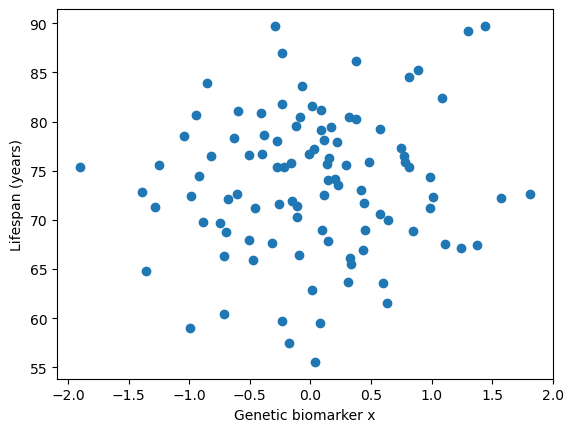

In [5]:
plt.scatter(x,lifespan)
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** What do you observe? Does the hypothesized relationship between the biomarker $x$ and lifespan appear present in the data?

**A:**
- The data look like a random cloud of points.
- It's very difficult to see the hypothesized relationship between $x$ and lifespan.

</div>

Let's assess the relationship between the biomarker `x` and `lifespan` beyond visual inspection.

There are many ways to do so.

Here, we'll fit a line to the data and compute the slope.

In [6]:
# Estimate a line from the data.
from statsmodels.formula.api import ols
dat                = {"x": x, "lifespan": lifespan}
regression_results = ols("lifespan ~ 1 + x", data=dat).fit()

<div class="alert alert-block alert-success">

**Q:** If this code is new to you, don't worry. Can you see the equation for the line in the code above?

**A:**

- The general equation for a line is `y = b + mx` where `b` is the intercept and `m` is the slope.
- Here, we're interested in the specific line `lifespan = b + mx`.
- In the code above, we represent this equation with the notation `lifespan ~ 1 + x`. In this notation, we tell Python to estimate the outcome variable `lifespan` as a function of a constant (with label `1` in the code) and predictor `x`. Python then estimates the solution to `linespan = b + mx` by finding the best values for `b` (the intercept) and `m` (the slope).
- In the code above, we estimate the slope `m`, which characterizes the relationship between `lifespan` and `x`.
</div>

Now, with the line estimated, we can print the estimated slope,  and its p-value.

In [7]:
print('Slope estimate                   = {:.3f}'.format(regression_results.params.iloc[1]))
print('Standard error of slope estimate = {:.3f}'.format(regression_results.bse['x']))
print('p-value                          = {:.3f}'.format(regression_results.pvalues.iloc[1]))

Slope estimate                   = 0.915
Standard error of slope estimate = 1.018
p-value                          = 0.371


Let's interpret these numbers:

#### Slope estimate = 0.915

**Meaning:** The slope estimate represents the change in the `lifespan` for a one-unit change in the genetic biomarker `x`.

**Interpretation:** For every one-unit increase the genetic biomarker `x`, the lifespan is estimated to increase by 0.915 years, on average.

#### Standard error of slope estimate = 1.018

**Meaning:** The standard error measures the average amount that the slope estimate varies from the true slope of the population regression line. It indicates the precision of the slope estimate.

**Interpretation:** A standard error of 1.018 suggests that the slope estimate (0.915) could vary by about $2 * 1.018$ units from the true slope. Given that the standard error is relatively large compared to the slope estimate, this implies that there is a considerable amount of uncertainty in the estimate.

#### p-value = 0.371

**Meaning:** The p-value is used to test the null hypothesis that the slope of the regression line is zero (no relationship between `x` and `lifespan`).

**Interpretation:** The p-value describes the probability of seeing an effect at least this large if substance x had no relation to lifespan. A p-value of 0.371 is much larger than commonly used thresholds to significance levels (e.g., 0.05). This means that there is not enough evidence to reject the null hypothesis. In other words, the data do not provide sufficient evidence to conclude that there is a statistically significant relationship between `x` and `lifespan`.

Let's also **visualize** the estimated line by plotting it with the data.

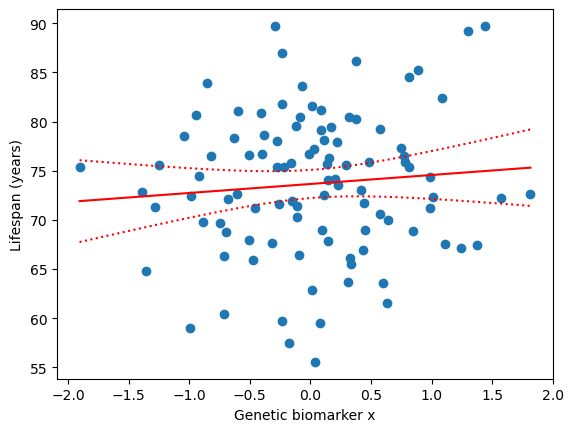

In [8]:
pred   = regression_results.get_prediction().summary_frame()
mn     = pred['mean']
ci_low = pred['mean_ci_lower'] 
ci_upp = pred['mean_ci_upper']

# And plot it.
indices_sorted = np.argsort(x,0)
plt.scatter(x,lifespan)
plt.plot(x[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.plot(x[indices_sorted[:,0]],ci_low[indices_sorted[:,0]], ':r')
plt.plot(x[indices_sorted[:,0]],ci_upp[indices_sorted[:,0]], ':r')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** Do you find a significant relationship between the genetic biomarker `x` and `lifespan`?

**A:**

- No. The results suggest that while there is a positive slope, indicating a potential relationship between the genetic biomarker `x` and `lifespan`, the high standard error and non-significant p-value imply that this relationship is not statistically significant. Further investigation with more data or additional variables may be needed to draw more definitive conclusions.
</div>

<div class="alert alert-block alert-danger">
<b>Alert: Wait, this doesn't make sense!</b>

</p>

- We've applied a standard approach to compute sample size `N` and performed the experiment using this sample size.

- We see a trend supporting the hypothesized relationship, but it's not significant.

- Has the experiment failed?

- What's going on?
</div>

# Choose your own adventure ...

<div class="alert alert-block alert-danger">
<b>Alert to CENTER:</b> What follows is a "choose your own adventure" format, in the style of the old books. The learner picks an option below to continue (either 3A, 3B, or 3C). Not all choices lead to good outcomes. This supports "replayability" of the Mini (e.g., learner can return and play another path).
</div>

To make sense of these confusing results, we'll use the data collected to estimate the power and improve our choice of sample size.

---

## Which path will you pursue to compute the sample size?**

## **3A-** I'll use resampling (Turn To Page 3A)

## **3B-** I'll build models (Turn To Page 3B)

## **3C-** Do nothing, I'll stick with the current sample size choice (Turn to Page 3C)

---

# 3A- With resampling you can compute the sample size!


The data provided in Mini 2 represent one instantiation of the experiment, conducted with a sample size `N`. While our analysis of these data did not yield evidence to support our hypothesis, they remain extremely useful for our continued investigation into sample size. Specifically, we can leverage these data to estimate the necessary sample size for a subsequent experiment. By implementing a resampling procedure, we will systematically examine how variations in sample size `N` influence our capacity to detect a significant result, thus optimizing our experimental design for future investigations.

### Resampling procedure (Introduction)
We're going to attempt something that seems far-fetched and magical: we'll generate new data from our existing data. To do so, we'll implement a nonparametric bootstrap to generate new pseudodata from the observed data. 

*A note on the nonparametric bootstrap.* Briefly, there is strong theoretical justification for the nonparametric bootstrap. The fundamental idea is that resampling the data with replacement is equivalent to sampling new pseudodata from the empirical cumulative distribution function (eCDF) of the observed data. For a large sample of independent, identically distributed random variables, the distribution of the pseudodata generated from the eCDF will be close to the true distribution of the data. Note the important caveat that the variables are independent, identically distributed; this assumption fails in many cases, such as for time series. Here, we assume that the genetic biomarker and lifespan from each subject are drawn independently from the same distribution (i.e., the values from a subject are independent, identically distributed variables).

### Resampling procedure (4 steps)

Our resampling procedure consists of 4 steps:

1) Choose a new sample size (call it `N_resampled`).
2) Draw a new (random) set of `N_resampled` labels we can use to index our data (biomarker $x$ and lifespan).
3) Use these indices to create new pseudodata: a resampled data set.
4) Compute the relationship (and its statistical significance) between the biomarker $x$ and lifespan in our resampled data.

We'll now describe each step. For a related example, [see this video](https://youtu.be/mqDEJyW_z4c?si=heigY8z5PqAjnwKZ).

### Resampling procedure: Step 1
Our first step is to choose a new sample size. Let's call it `N_resampled`.

<div class="alert alert-block alert-success">

**Q:** What will you choose for `N_resampled`?

**A:**
- Our original choice of sample size resulted in a positive slope estimate, indicating a potential relationship between the genetic biomarker `x` and `lifespan`. But, the high standard error and non-significant p-value imply that this relationship is not statistically significant. Further investigation with more data may draw more definitive conclusions. However, to start, let's fix `N_resampled = N`, the original sample size.
</div>

In [9]:
N_resampled = N;

**Thus concludes Step 1 of our resampling procedure.**

We'll start by fixing `N_resampled = N`, the original sample size. In what follows, we'll adjust this value and examine the impact.

### Resampling procedure: Step 2
Our second step is to draw a random set of `N_resampled` labels to index our data (biomarker `x` and `lifespan`).

To visualize this procedure, imagine we assign each patient in the original data set a number, from $0$ up to `N`. We then write each number on a marble and place all `N` marbles in an opaque bag. Each marble is assigned a unique integer value from 0 to `N`-1. Now, reach your hand into the bag, grab a marble, record its number, and replace the marble in the bag. We assume that each marble is equally likely to be selected at each draw (i.e., there are no special features that allow some marbles to be drawn more often). Repeat this procedure `N_resampled` times to create a list of `N_resampled` integers. Notice that after recording the drawn marble’s number, we replace it in the bag. So, we could potentially draw the same marble `N_resampled` times, although that’s extremely unlikely.

Performing this sampling with replacement procedure by hand would, of course, be extremely time consuming (e.g., who will paint integers on each marble?). Fortunately, this is the type of boring task where a computer excels.

Let's have a look at this "marble draw":

In [10]:
ind = np.random.choice(np.size(x), N_resampled)
print(ind)

[53 70 16 55 27 78  6  0 66 55 85 79 85  6 59  2 87 87 41 23 97  7 48  6
 20  0 34 39  1 46 23 16  6 52  0 73 60 72 75 34 12 60 50 84 15 42 66 86
 83 13 23 28 64 35 69 64 37 68 72 85 13 41 46 69  3 50 62 54 67 37 15  5
 23 96 34 96 66 58 40 34 66 94 41 75 36 80 38 38 91 83 83 23 59 21  8 97
 41 89 12 31]


<div class="alert alert-block alert-success">

**Q:** Look at the values in `ind`. What do they mean?

**A:**
- There are `N_resampled` values in the vector `ind`. That's because we draw `N_resampled` marbles.
- These are the indices to our original data set. You can think of these as numbers indicating participants in the study (e.g., Participant 1, Participant 10, Participating 102, ...)
</div>

<div class="alert alert-block alert-success">

**Q:** Run the code to generate `ind` again. What do you find? (I.e., is it the same or different than the first time?)

**A:**

- Because we draw random sets of indices, the values in `ind` will differ each time we run the code.

</div>

**Thus concludes Step 2 of our resampling procedure.**

We can now generate a set of random indices to our data. We'll use these to create pseudodata in the next step.

### Resampling procedure: Step 3

Our third step is to use these indices to generate the resampled data. To do so, we'll draw data from the study participants using the indices in `ind`. Again, this is a task for a computer:  

In [11]:
x_resampled        = x[ind]
lifespan_resampled = lifespan[ind]

<div class="alert alert-block alert-success">

**Q:** How many values are in the resampled data `x_sampled` and `lifespan_resampled`?

**A:**
- There are `N_resampled` values in resampled data. That's because we're usig the vector `ind` to resample the data, and we drew `N_resampled` marbles.
</div>

Let's see what those values look like, compared to our original data set.

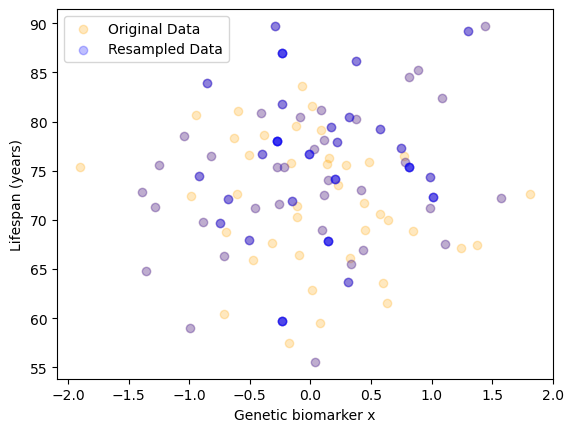

In [12]:
plt.scatter(x, lifespan, color='orange', alpha=0.25, label='Original Data')
plt.scatter(x_resampled, lifespan_resampled, color='blue', alpha=0.25, label='Resampled Data')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');
plt.legend();

<div class="alert alert-block alert-success">

**Q:** Compare the plots of the original data (`x` and `lifespan`) with the pseudodata (`x_resampled` and `lifespan_resampled`). What do you observe? Do the pseudodata "look like" the original data?

**A:**
- The pseudodata overlaps the original data. That makes sense because we draw the pseudodata from the original data.
- By chance, we draw some of the original data multiple times, and other original data not at all.
</div>

**Thus concludes Step 3 of our resampling procedure.**

We can now generate pseudodata from our original data. We'll assess the relationship between these pseudodata in the next step.

### Resampling procedure: Step 4

Our fourth step is to compute the relationship (and its statistical significance) between the resampled biomarker $x$ and resampled lifespan.

To do so, we'll follow the same approach as above. We'll fit the same line to new resampled data, and again compute the slope and significance.

In [13]:
# Estimate a line from the resampled data.
from statsmodels.formula.api import ols
dat_resampled                = {"x": x_resampled, "lifespan": lifespan_resampled}
regression_results_resampled = ols("lifespan ~ 1 + x", data=dat_resampled).fit()

print('Slope estimate (resampled data)                   = {:.3f}'.format(regression_results_resampled.params.iloc[1]))
print('Standard error of slope estimate (resampled data) = {:.3f}'.format(regression_results_resampled.bse['x']))
print('p-value (resampled data)                          = {:.3f}'.format(regression_results_resampled.pvalues.iloc[1]))

Slope estimate (resampled data)                   = 2.247
Standard error of slope estimate (resampled data) = 1.120
p-value (resampled data)                          = 0.048


<div class="alert alert-block alert-success">

**Q:** Are the slope estimate in the original data and resampled data similar or different? What about the standard errors in the estimates?

**A:**
- The slope estimates are similar (near 1).
- The standard error estimates are similar (near 1).

</div>

<div class="alert alert-block alert-success">

**Q:** So far, we've fixed `N_resampled = N`, the original sample size. Change `N_resampled` and repeat Modeling Steps 2,3,4 to generate results from multiple "experiments". Do you ever find a significant result? How often do the p-values you find reach your desired level of statistical significance? How does this depend on the value `N_resampled`?

**A:**
- Yes, now we can sometimes find p<0.05 in the modeled data when `N_resampled` is large (e.g., 1000).
</div>

**Thus concludes Step 4 of our resampling procedure.**

We've now marched through the entire modeling procedure.

As a final step of this procedure, we'll use this modeling approach to estimate the statsitcal power of our original experiment and a good sample size for increased power.

### Now, let's use this resampling approach to determine a good sample size for our experiment.

To do so, we'll first introduce the concept of **statistical power**.

In the context of statistical analysis, power and sample size are closely interrelated concepts.

**Statistical Power** is the probability that a test will correctly reject a false null hypothesis (i.e., detect an effect if there is one). Higher power reduces the risk of a Type II error, where a real effect is missed (failing to reject a false null hypothesis).

Our initial challenge was to compute the **sample size**: the number of observations or data points included in a study. Our initial choice `N` was too small; with this choice, we did not detect a significant relationship between the biomarker `x` and lifespan, i.e., we did not have enough **statistical power**.

Using resampling, we generated pseudodata with an increased sample size `N_resampled`. Doing so in the exercise above, you might have found (sometimes) a significant relationship between the siualted biomarker `x` and simulated lifespan; you might have (sometimes) found p<0.05, the arbitrary magical threshold often used to declare a significant effect. If you'd like to understand this magic, check out [LINKS TO OTHER METERS].


We can use this same resampling procedure to compute the statistical power of our test given the sample size. We'll do so in a few steps:

### Resampling procedure to estimate the statistical power (6 steps)

1) Choose a new sample size (call it `N_resampled`).
2) Draw a new (random) set of `N_resampled` labels we can use to index our data (biomarker $x$ and lifespan).
3) Use these indices to create new pseudodata: a resampled data set.
4) Compute  statistical significance (p-value) between the biomarker $x$ and lifespan in our resampled data.
5) Repeat Steps 1-5 `K` times, saving the p-value each time.
6) The **statistical power** is the proportion of p-values below a chosen threshold `alpha`.

That's a lot of steps! Let's break them down:

### Resampling procedure: Steps 1-4

However, you've already done steps 1-4 when performing resampling to create pseudodata. Nothing new to see here.

### Resampling procedure: Step 5

We've added Step 5, in which we create `K` new instances of the pseudodata. For each instance, we calculate and save the p-value corresponding to the statistical significance of the relationship between the biomarker $x$ and lifespan in our resampled data.

At the end of Step 5, we'll have created a vector of `K` p-values. Let's do so now:

In [14]:
N_resampled = N
K = 1000
p_values = np.zeros(K)
for k in np.arange(K):                                 # For each k,
    ind = np.random.choice(np.size(x), N_resampled)    # ... get N_resampled indices,
    x_resampled = x[ind]                               # ... to create the pseudodata.
    lifespan_resampled = lifespan[ind]                 # Estimate the line,
    dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_values[k] = regression_results.pvalues.iloc[1]         # ... and save the p-value of the slope.

Let's investigate this list of p-values by plotting a historgram:

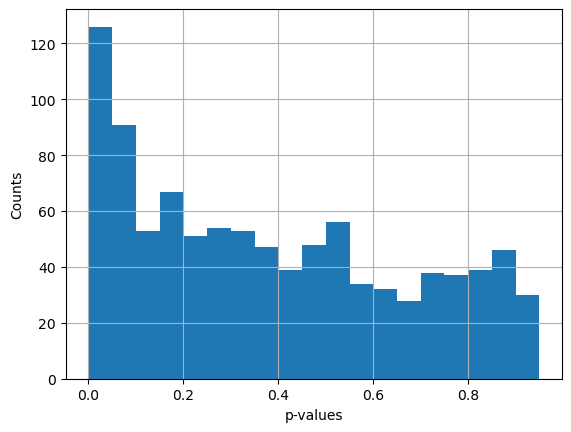

In [15]:
plt.hist(p_values, bins=np.arange(0,1,0.05));
plt.xlabel('p-values')
plt.ylabel('Counts')
plt.grid()

<div class="alert alert-block alert-success">

**Q:** What p-values do you observe?

**A:**
- P-values extend from near 0 to near 1.
- P-values are slightly more concentrated near 0, but extend to cover the entire range.
</div>

### Resampling procedure: Step 6
Our last step to compute the statistical power is the proportion of p-values below a chosen threshold `alpha`.

The threshold `alpha` represents the threshold for rejecting the null hypothesis when it is actually true. It's conventional to set

`alpha = 0.05`

which means that there is a 5% chance of committing a Type I error, which is the error of incorrectly rejecting a true null hypothesis. This  value is not inherently magical or optimal in all circumstances. But, it has become a convention primarily because it offers a middle ground that has been deemed acceptable by the scientific community for controlling Type I errors.

To implement Step 6, let's compute the `statistical_power` as the proportion of times that `p_values` is less than the threshold `alpha`.

In [16]:
alpha = 0.05;
statistical_power = np.sum(p_values < 0.05)/K
print(statistical_power)

0.126


<div class="alert alert-block alert-success">

**Q:** Interpret the value in `statistical_power`. What does it mean?

**A:**
- This value represents the proportion of times we drew pseudodata and detected a significant relationship between the biomarker `x` and lifespan. 

</div>

The value in `statistical_power` is the **statistical power** of our test. It represents the proportion of times we reject the null hypothesis and declare a significant relationship between the biomarker `x` and lifespan.

To make this graphically explicit, let's replot the histogram of `p-values` with a line at our threshold `alpha`.

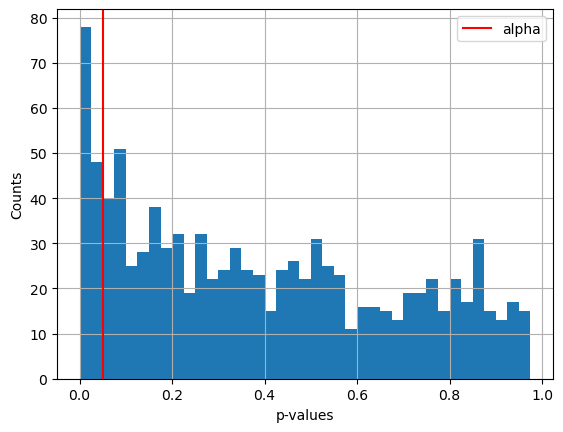

In [17]:
plt.hist(p_values, bins=np.arange(0,1,0.025));
plt.xlabel('p-values')
plt.ylabel('Counts')
plt.grid()
plt.axvline(x=0.05, color='red', label='alpha')
plt.legend();

In this plot, the **statistical power** is the proportion of values to the left (i.e., smaller than) the red line.

And that's it!

The **statistical power** is not a mystical quantity. It's the probability that a test will correctly reject a false null hypothesis. And, using the data we collected, we can compute this **statistical power** for different choices of sample size (`N_resample`).

Let's collect all the code, and perform one more experiment:

In [18]:
N_resampled = N
alpha       = 0.05
K           = 1000
p_values = np.zeros(K)
for k in np.arange(K):                                 # For each k,
    ind = np.random.choice(np.size(x), N_resampled)    # ... get N_resampled indices,
    x_resampled = x[ind]                               # ... to create the pseudodata.
    lifespan_resampled = lifespan[ind]                 # Estimate the line,
    dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_values[k] = regression_results.pvalues.iloc[1]         # ... and save the p-value of the slope.
statistical_power = np.sum(p_values < 0.05)/K
print('Statistical power = {:.3f}'.format(statistical_power), 'for N_resampled={:.0f}'.format(N_resampled), 'and alpha={:.2f}'.format(alpha))

Statistical power = 0.129 for N_resampled=100 and alpha=0.05


<div class="alert alert-block alert-success">

**Q:** We've used our original sample size by setting `N_resampled = N` in the code above. What is the statistical power? Does this make sense with our original conclusion in Mini 2?

**A:**
- Using our original sample size (`N=100`), the statistical power is small, less than 0.15.
- Therefore, with this sample size, we do not expect enough power to detect a significant effect.
- This is consistent with the results in Mini 2, in which we failed to detect a significant effect.
</div>

<div class="alert alert-block alert-success">

**Q:** Increase `N_resampled` in the code above. What happens to the statistical power?

**A:**
- Statistical power increases with `N_resampled`.
- Larger samples provide more information about the population, leading to more precise estimates of the population parameters. This precision reduces the standard error and widens the gap between the null hypothesis and the alternative hypothesis if there is a true effect, making it easier to detect significant differences. Therefore, increasing the sample size typically increases the power of a statistical test.

</div>

<div class="alert alert-block alert-success">

**Q:** At what value of `N_resampled` does the statistical power equal 0.80?

**A:**
- At approximately `N_resampled` = 1000, the statistical power equals 0.80.
</div>

<div class="alert alert-block alert-success">

**Q:** Why do we choose statistical power 0.8?

**A:**
Choosing a statistical power of 0.8, or 80%, is a common convention in many fields of research, particularly in the social and biomedical sciences. 

Statistical power is the probability of correctly rejecting a false null hypothesis, thus avoiding a Type II error. A power of 0.8 means there is a 20% chance of a Type II error (failing to detect a true effect). Setting the power at 0.8 provides a reasonable balance between the risks of Type I errors (false positives) and Type II errors (false negatives). Researchers often choose a 5% (`alpha=0.05`) significance level for Type I errors, aiming to maintain a pragmatic yet cautious approach to declaring findings.

Increasing power beyond 0.8 generally requires larger sample sizes, which can escalate the costs and logistical complexity of a study. The choice of 0.8 is considered a good trade-off between increasing precision and controlling operational constraints.

The 0.8 level has become somewhat of a standard through historical precedent and its endorsement in statistical texts and guidelines. Researchers often follow these conventions to align with accepted practices, making their studies comparable to others in the field.

## Turn to Page 4 (Summary)

# 3B- Build models to compute the sample size!

The data provided in Mini 2 represent one instantiation of the experiment, conducted with a sample size `N`. While our analysis of these data did not yield evidence to support our hypothesis, they remain extremely useful for our continued investigation into sample size. Specifically, we can leverage these data to estimate the necessary sample size for a subsequent experiment. By estimating models of these data, we will systematically examine how variations in sample size `N` influence our capacity to detect a significant result, thus optimizing our experimental design for future investigations.

#### Modeling procedure (Introduction)
We're going to attempt something that seems far-fetched and magical: we'll generate new data from our existing data. To do so, we'll estimate models from the existing data, and use those models to simulate new synthetic data.

#### Modeling procedure (4 steps)

Our modeling procedure consists of 4 steps:

1) Estimate a model for biomarker `x`.
2) Estimate a model of the relationship between biomarker `x` and lifespan.
3) Choose a new sample size (call it `N_modeled`) and simulate data from the models.
4) Compute the relationship (and its statistical significance) between the simulated biomarker $x$ and lifespan.

We'll now describe each step.

### Modeling procedure: Step 1
Our first step is to estimate a model for biomarker `x`.

To do so, let's begin by visualizing the biomarker `x` in a historgram:

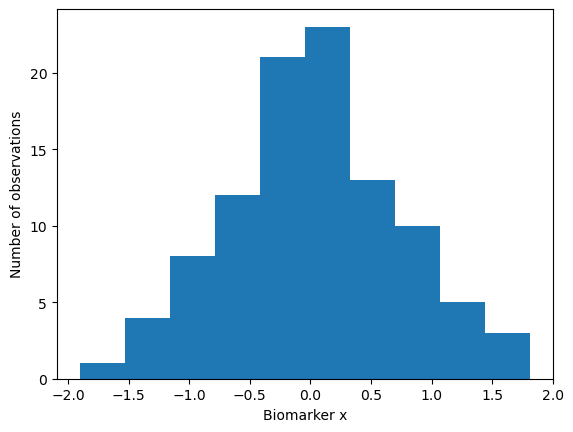

In [19]:
plt.hist(x);
plt.xlabel('Biomarker x');
plt.ylabel('Number of observations');

<div class="alert alert-block alert-success">

**Q:** Describe the histogram. What does it look like?
    
**A:**
- The histogram has most values near 0, with fewer values near +/- 2.
- It's approximately bell-shaped.
- It's looks "normal" or "Gaussian".

</div>

We conclude that the values for biomarker `x` look approximately [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution).

That's very useful, because it suggests we can model the data as normally distributed.

Normal distributions are nice because we only need to estimate two parameters: **the mean and standard deviation**.

Let's compute those values in Python:

In [20]:
# Estimating the parameters of the normal distribution for the biomarker x
mean_x = np.mean(x)
std_x  = np.std(x)
print('Mean of x               = {:.2f}'.format(mean_x))
print('Standard deviation of x = {:.2f}'.format(std_x))

Mean of x               = 0.03
Standard deviation of x = 0.71


<div class="alert alert-block alert-success">

**Q:** Interpert the values of `mean_x` and `std_x`. How do they compare to the histogram of biomarker `x` plotted above?

**A:**

- The mean of the distribution for biomarker `x` is very close to zero. This suggests that on average, the values in the biomarker center around zero, consistent with our visualization of the data in the histogram.
- The standard deviation measures the dispersion or spread of the data points around the mean. A standard deviation of 0.71 indicates that the typical deviation from the mean biomarker values is about 0.71 units. For a normal distribution, we expect about 68% of the data to fall within one standard deviation of the mean (i.e., between -0.68 and 0.74), and about 95% of the data to fall within two standard deviations (i.e., between -1.39 and 1.45). Those ranges appear are consistent with our visualization of the data in the histogram.
</div>

Now, with these two parameters estimated, we've completely specificed our model of biomarker `x`.

In words, we'll model `x` as normally distributed with mean `mean_x` = 0.03 and standard deviation `std_x` = 0.71.

In Python, it's **easy to simulate values from this model.**

Let's do so, and simulate 100 values from the model.

In [21]:
N_modeled = 100;
x_modeled = np.random.normal(loc=mean_x, scale=std_x, size=[N_modeled,1])
print(x_modeled)

[[-0.74158321]
 [ 0.45493394]
 [-0.06983405]
 [-0.41747256]
 [-0.63355909]
 [-0.7194543 ]
 [-0.19664542]
 [ 0.23643093]
 [ 0.58947562]
 [-1.33869104]
 [-0.87251847]
 [ 1.8138841 ]
 [-0.22554736]
 [ 0.53864588]
 [-0.1636063 ]
 [ 1.37094011]
 [-1.06397284]
 [ 2.30692322]
 [ 0.78500789]
 [-0.76319583]
 [-1.10674339]
 [ 0.55280285]
 [ 0.49039136]
 [ 1.08563178]
 [-0.76576082]
 [-0.46222946]
 [ 0.51661214]
 [ 0.6271488 ]
 [-0.00338837]
 [ 0.64540558]
 [-0.39731051]
 [ 0.25026413]
 [ 0.13977328]
 [-0.09971259]
 [ 0.38653216]
 [-0.28674966]
 [-0.51597023]
 [ 0.97428948]
 [ 0.833216  ]
 [-0.86038332]
 [-0.50706025]
 [-0.06106684]
 [ 0.94978267]
 [ 0.82372297]
 [ 2.09769769]
 [ 0.07342463]
 [ 0.43128639]
 [-0.27354893]
 [ 1.22382015]
 [-0.01819182]
 [ 0.48126896]
 [ 0.78619447]
 [ 0.7120572 ]
 [-0.68357625]
 [-0.75827285]
 [-0.29341849]
 [ 0.99841628]
 [ 1.87118155]
 [-0.22305692]
 [-1.54635721]
 [ 0.33634266]
 [-0.45905972]
 [ 0.07048535]
 [ 0.18139577]
 [-0.2114409 ]
 [ 0.99914833]
 [ 0.15458

<div class="alert alert-block alert-success">

**Q:** Compared `x_modeled` to the original values `x`. Do the values appear consistent?

**A:**

- Yes. In `x_modeled` there are many values near 0, and few values near +/- 2.
</div>

Let's also plot histograms for the original data `x` and the modeled data `x_modeled`.

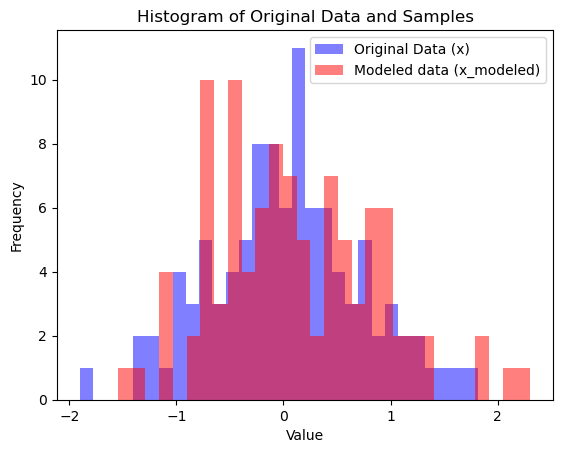

In [22]:
plt.hist(x,         bins=30, alpha=0.5, label='Original Data (x)', color='blue')
plt.hist(x_modeled, bins=30, alpha=0.5, label='Modeled data (x_modeled)', color='red')
plt.title('Histogram of Original Data and Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">

**Q:** Compared the histograms of `x_modeled` and the original values `x`. Do the histograms appear consistent?

**A:**

- Yes. In `x_modeled` there are many values near 0, and few values near +/- 2.
</div>

**Thus concludes Step 1 of our modeling procedure.**

We've modeled the biomarker `x` as normally distributed, with mean and standard deviation estimated from our observed data.

### Modeling procedure: Step 2
Our second step is to estimate a model of the lifespan.

Thankfully, we've already completed this step!

In Mini 2, we modeled the relationship between biomarker $x$ and lifespan as a line.

Here's that code again:

In [23]:
# Estimate a line from the data.
from statsmodels.formula.api import ols
dat   = {"x": x, "lifespan": lifespan}
model = ols("lifespan ~ 1 + x", data=dat).fit()

As we discussed in Mini 2, the model consists of two parameters: the `slope` and `intercept`.

Let's define and print those:

In [24]:
slope     = model.params.iloc[1]
intercept = model.params.iloc[0]

print('Slope estimate     = {:.2f}'.format(slope))
print('Intercept estimate = {:.2f}'.format(intercept))

Slope estimate     = 0.91
Intercept estimate = 73.65


Do those values make sense?

Let's check by plotting the data with our estimated line:

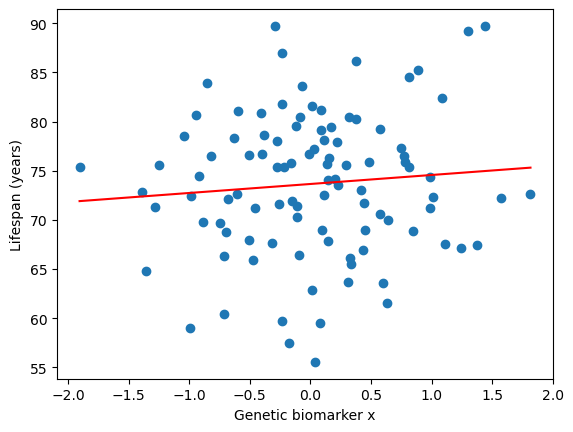

In [25]:
# Get the model prediciton.
pred   = model.get_prediction().summary_frame();  mn = pred['mean']
# And plot it.
indices_sorted = np.argsort(x,0)
plt.scatter(x,lifespan)
plt.plot(x[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** Examine the plot above. Do the estimated values for `slope` and `intercept` make sense?

**A:**

- The intercept is the value of `lifespan` when `x=0`. Looking at the plot, this occurs near 73 years, consistent with the value of intercept.
- The line has a small upward tilt. This indicates the lifespan increases a tiny bit for each unit increase in biomarker $x$, consistent with the slope of 0.91.
</div>

To simulate the model of lifespan, we'll need to extract one more parameter from the estimated model: the **dispersion**.


The **dispersion parameter** describes the amount of uncertainty in our ability to predinct each data point. In this case, it is the residual standard deviation of the lifespan after we have tried to predict it using the expression level of substance $x$.

Let's get the dispersion from the estimated model:

In [26]:
dispersion = np.sqrt(model.scale)
print('Dispersion parameter = {:.2f}'.format(dispersion))

Dispersion parameter = 7.22


*Programming aside:* We calculate the dispersion parameter using the `np.sqrt(model.scale)` formula from the fitted Ordinary Least Squares (OLS) model. In the context of an OLS model, the `model.scale` attribute reflects the variance of the residuals (errors), and taking the square root of this variance gives you the standard deviation.

In general the dispersion (or standard deviation) tells us how much the residuals (differences between observed and predicted values) are spread out around the mean of the residuals. A higher value indicates a greater spread, suggesting more variability in the errors.

In this case, a dispersion value of 7.22 means that, on average, the actual `lifespan` values deviate from the values predicted by our model by about 7.22 units. This indicates an average error magnitude of approximately 7 years from the predicted lifespan based on your model.

<div class="alert alert-block alert-success">

**Q:** So, the dispersion parameter indicates how well my model fits the data. Don't I want the dispersion to be 0?

**A:**

- In general, we do *not* expect the dispersion parameter to be 0. Our model represents a simplification of the data: we're using a simple line to capture the relationship between biomarker $x$ and lifespan. We do *not* expect this line to capture every nuance of the relationship; these are complicated biological entities with complex relationships. So, we're happy with a non-zero dispersion.
</div>

**Thus concludes Step 2 of our modeling procedure.**

With the 3 estimated model parameters, we can now simulate values of lifespan from the model. We'll do so in the next step.

### Modeling procedure: Step 3
Our next step is to choose a new sample size (call it `N_modeled`) and simulate data from our models.

With the our models estiamted from the original data, we can now simulate realizations of models. 

To do so, we'll evaluate these model:

`x_modeled        = np.random.normal(loc=mean_x, scale=std_x, size=N_modeled)`

`lifespan_modeled = intercept + slope * x_modeled + np.random.normal(loc=0.0, scale=dispersion, size=N_modeled)`

<div class="alert alert-block alert-success">

**Q:** Describe - in words - each term in the equations above.
- What variables do you recognize?
- What variables are now?
- What is the equation doing?
    
</div>

The first equation should look familiar ... it's our model of biomarker `x`, described in Step 2.

The second equation might also look familar ... it's the linear model we originally estimated data, with an added random noise component to simulate data.

Here's a breakdown of each term in the second equation:

- **lifespan_modeled**: This is the dependent variable in the equation, representing the predicted values of lifespan based on the model. This variable is being assigned the values calculated by the formula on the right-hand side.

- **intercept**: This is the intercept of the linear model. It represents the value of the dependent variable (`lifespan_modeled`) when the independent variable (`x`) is zero.

- **slope**: This term is the coefficient of the independent variable `x` in the linear model. It measures the amount by which `lifespan_modeled` is expected to increase for a one-unit increase in `x`. It represents the steepness or incline of the regression line.

- **x**: This is the independent variable or predictor in the model. Here we use biomarker 'x' to predict `lifespan_modeled`. We assume the relationship between `x` and `lifespan_modeled` is linear in this model.

- **np.random.normal(loc=0.0, scale=dispersion, size=[N_modeled,1])**: This function generates random noise added to the linear model, simulating variability in the data that is not explained by the independent variable `x` alone:

    - **loc=0.0**:  This specifies the mean of the normal distribution from which the random noise is drawn. A mean of 0 indicates that the noise is centered around zero, adding no systematic bias to the predictions, just variability.
    - **scale=dispersion**: This is the standard deviation of the normal distribution. It controls the variability of the noise added to the model. The term dispersion here is whate we calculated above, representing the standard deviation of the residuals in the linear model.
    - **size=[N_modeled,1]**: This specifies the shape of the array of random values generated. `N_modeled` is the number of observations or samples for which you are modeling lifespan_modeled. The [N_modeled,1] format makes the output an N_modeled-by-1 array, where each element is a random noise value added to the corresponding model prediction.

With the estimated models in hand, it's now simple to simulate data from the models.

To do so, we must choose a value for `N_modeled`.

Let's start by setting `N_modeled = N`, our original sample size, and then simulate the models. To do so, 

In [27]:
N_modeled = N
x_modeled        = np.random.normal(loc=mean_x, scale=std_x, size=[N_modeled,1])
lifespan_modeled = intercept + slope * x_modeled + np.random.normal(loc=0.0, scale=dispersion, size=[N_modeled,1])

<div class="alert alert-block alert-success">

**Q:** How many values are in the simulated data `x_sampled` and `lifespan_resampled`?

**A:**
- There are `N_resampled` values in resampled data. That's because we're usig the vector `ind` to resample the data, and we drew `N_resampled` marbles.
</div>

Let's see what those modeled values look like, compared to our original data set.

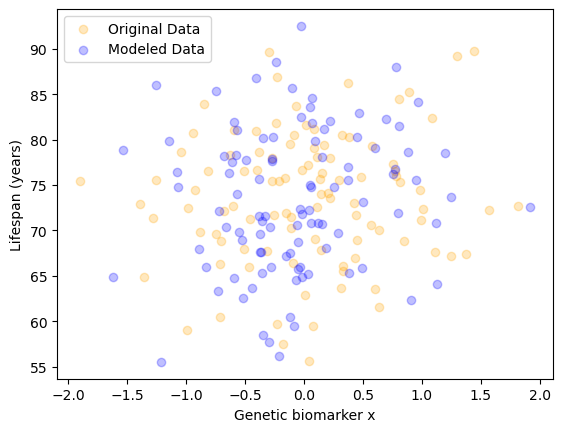

In [28]:
plt.scatter(x, lifespan, color='orange', alpha=0.25, label='Original Data')
plt.scatter(x_modeled, lifespan_modeled, color='blue', alpha=0.25, label='Modeled Data')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');
plt.legend();

<div class="alert alert-block alert-success">

**Q:** Compare the plots of the original data (`x` and `lifespan`) with the modeled data (`x_modeled` and `lifespan_modeled`). What do you observe? Do the modeled data "look like" the original data?

**A:**

- The modeled data overlap the original data. The two sets of data have appoximately the same range of biomarker values (from -2 to 2) and lifespan values (from 55 to 90 years).
</div>

**Thus concludes Step 3 of our modeling procedure.**

We can now simulate data from our models. We'll assess the relationship between these simulated values in the next step.

### Modeling procedure: Step 4

Our fourth step is to compute the relationship (and its statistical significance) between the modeled biomarker $x$ and modeled lifespan.

To do so, we'll follow the same approach as above. We'll fit the same line to new modeled data, and again compute the slope and significance.

In [29]:
# Estimate a line from the modeled data.
from statsmodels.formula.api import ols
dat_modeled                = {"x": x_modeled, "lifespan": lifespan_modeled}
regression_results_modeled = ols("lifespan ~ 1 + x", data=dat_modeled).fit()

print('Slope estimate (modeled data)                   = {:.3f}'.format(regression_results_modeled.params.iloc[1]))
print('Standard error of slope estimate (modeled data) = {:.3f}'.format(regression_results_modeled.bse['x']))
print('p-value (modeled data)                          = {:.3f}'.format(regression_results_modeled.pvalues.iloc[1]))

Slope estimate (modeled data)                   = 1.501
Standard error of slope estimate (modeled data) = 1.250
p-value (modeled data)                          = 0.233


<div class="alert alert-block alert-success">

**Q:** Are the slope estimate in the original data and modeled data similar or different? What about the standard errors in the estimates?

**A:**
- The slope estimates are similar (near 1).
- The standard error estimates are similar (also near 1).
</div>

<div class="alert alert-block alert-success">

**Q:** So far, we've fixed `N_modeled = N`, the original sample size. Change `N_modeled` and repeat Modeling Steps 2,3,4 to generate results from multiple "experiments". Do you ever find a significant result? How often do the p-values you find reach your desired level of statistical significance? How does this depend on the value `N_modeled`?

**A:**
- Yes, now we can sometimes find p<0.05 in the modeled data when `N_modeled` is large (e.g., 1000).
</div>

**Thus concludes Step 4 of our modeling procedure.**

We've now marched through the entire modeling procedure.

As a final step of this procedure, we'll use this modeling approach to estimate the statsitcal power of our original experiment and a good sample size for increased power.

### Now, let's use this modeling approach to determine a good sample size for our experiment.

To do so, we'll first introduce the concept of **statistical power**.

In the context of statistical analysis, power and sample size are closely interrelated concepts.

**Statistical Power** is the probability that a test will correctly reject a false null hypothesis (i.e., detect an effect if there is one). Higher power reduces the risk of a Type II error, where a real effect is missed (failing to reject a false null hypothesis).

Our initial challenge was to compute the **sample size**: the number of observations or data points included in a study. Our initial choice `N` was too small; with this choice, we did not detect a significant relationship between the biomarker `x` and lifespan, i.e., we did not have enough **statistical power**.

Using our modeling approach, we can generate simulated data with an increased sample size `N_modeled`. Doing so in the exercise above, you might have found (sometimes) a significant relationship between the siualted biomarker `x` and simulated lifespan; you might have (sometimes) found p<0.05, the arbitrary magical threshold often used to declare a significant effect. If you'd like to understand this magic, check out [LINKS TO OTHER METERS]. 

We can use this same modeling procedure to compute the statistical power of our test given the sample size. We'll do so in a few steps:

### Modeling procedure to estimate the statistical power (6 steps)

1) Estimate a model for biomarker `x`.
2) Estimate a model of the relationship between biomarker `x` and lifespan.
3) Choose a new sample size (call it `N_modeled`) and simulate data from the models.
4) Compute the relationship (and its statistical significance) between the simulated biomarker $x$ and lifespan.
5) Repeat Steps 1-4 `K` times, saving the p-value each time.
6) The **statistical power** is the proportion of p-values below a chosen threshold `alpha`.

That's a lot of steps! Let's break them down:

### Modeling procedure: Steps 1-4

You've already done Steps 1-4 when creating the models to generate simulated data. Nothing new to see here.

### Modeling procedure: Step 5

We've added Step 5, in which we create `K` new instances of the modeled data. For each instance, we calculate and save the p-value corresponding to the statistical significance of the relationship between the biomarker $x$ and lifespan in our modeled data.

At the end of Step 5, we'll have created a vector of `K` p-values. Let's do so now, with `N_modeled=N`.

In [30]:
N_modeled = N
K = 1000
p_values = np.zeros(K)
for k in np.arange(K):                                 # For each k,
    x_modeled          = np.random.normal(loc=mean_x, scale=std_x, size=[N_modeled,1])  # Simulate the model of biomarker x
    lifespan_modeled   = intercept + slope * x_modeled + np.random.normal(loc=0.0, scale=dispersion, size=[N_modeled,1]) # Simulate the model of lifespan
    dat                = {"x": x_modeled, "lifespan": lifespan_modeled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_values[k] = regression_results.pvalues.iloc[1]         # ... and save the p-value of the slope.

Let's investigate this list of p-values by plotting a historgram:

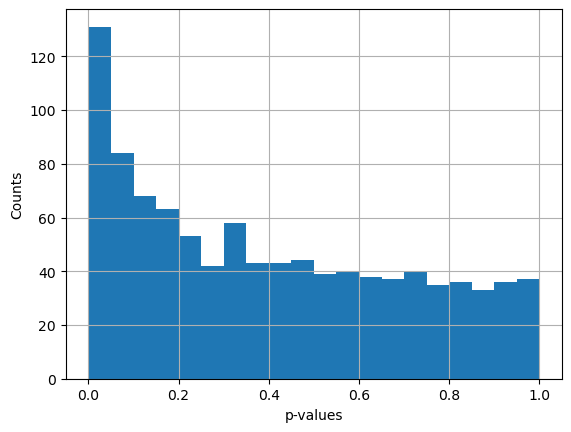

In [31]:
plt.hist(p_values, bins=np.arange(0,1.05,0.05));
plt.xlabel('p-values')
plt.ylabel('Counts')
plt.grid()

<div class="alert alert-block alert-success">

**Q:** What p-values do you observe?

**A:**
- P-values extend from near 0 to near 1.
- P-values are slightly more concentrated near 0, but extend to cover the entire range.

</div>

### Modeling procedure: Step 6
Our last step to compute the statistical power is the proportion of p-values below a chosen threshold `alpha`.

The threshold `alpha` represents the threshold for rejecting the null hypothesis when it is actually true. It's conventional to set

`alpha = 0.05`

which means that there is a 5% chance of committing a Type I error, which is the error of incorrectly rejecting a true null hypothesis. This  value is not inherently magical or optimal in all circumstances. But, it has become a convention primarily because it offers a middle ground that has been deemed acceptable by the scientific community for controlling Type I errors.

To implement Step 6, let's compute the `statistical_power` as the proportion of times that `p_values` is less than the threshold `alpha`.

In [32]:
alpha = 0.05;
statistical_power = np.sum(p_values < 0.05)/K
print(statistical_power)

0.131


<div class="alert alert-block alert-success">

**Q:** Interpret the value in `statistical_power`. What does it mean?

**A:**
- This value represents the proportion of times we created simualted data and detected a significant relationship between the biomarker `x` and lifespan. 

</div>

The value in `statistical_power` is the **statistical power** of our test. It represents the proportion of times we reject the null hypothesis and declare a significant relationship between the biomarker `x` and lifespan.

To make this graphically explicit, let's replot the histogram of `p-values` with a line at our threshold `alpha`.

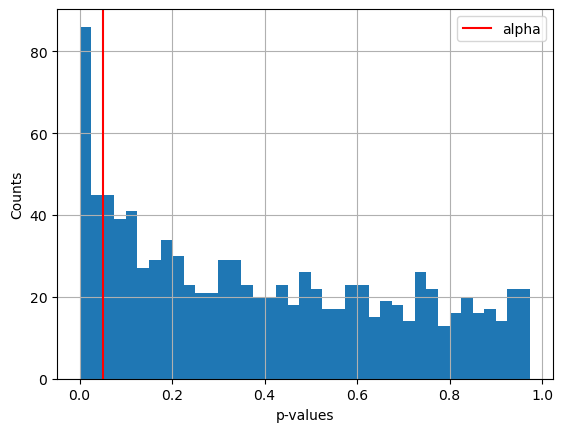

In [33]:
plt.hist(p_values, bins=np.arange(0,1,0.025));
plt.xlabel('p-values')
plt.ylabel('Counts')
plt.grid()
plt.axvline(x=0.05, color='red', label='alpha')
plt.legend();

In this plot, the **statistical power** is the proportion of values to the left (i.e., smaller than) the red line.

And that's it!

The **statistical power** is not a mystical quantity. It's the probability that a test will correctly reject a false null hypothesis.

And, using the data we collected, we can compute how the **statistical power** depends on sample size by changing the value of (`N_modeled`).

To that end, let's collect all the code, and perform one more experiment:

In [34]:
N_modeled = 1000
alpha     = 0.05
K         = 1000
p_values  = np.zeros(K)
for k in np.arange(K):                                 # For each k,
    x_modeled          = np.random.normal(loc=mean_x, scale=std_x, size=[N_modeled,1])  # Simulate the model of biomarker x
    lifespan_modeled   = intercept + slope * x_modeled + np.random.normal(loc=0.0, scale=dispersion, size=[N_modeled,1]) # Simulate the model of lifespan
    dat                = {"x": x_modeled, "lifespan": lifespan_modeled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_values[k] = regression_results.pvalues.iloc[1]         # ... and save the p-value of the slope.
statistical_power = np.sum(p_values < 0.05)/K
print('Statistical power = {:.3f}'.format(statistical_power), 'for N_modeled={:.0f}'.format(N_modeled), 'and alpha={:.2f}'.format(alpha))

Statistical power = 0.837 for N_modeled=1000 and alpha=0.05


<div class="alert alert-block alert-success">

**Q:** We've used our original sample size by setting `N_modeled = N` in the code above. What is the statistical power? Does this make sense with our original conclusion in Mini 2?

**A:**
- Using our original sample size (N=100), the statistical power is small, near 0.15.
- Therefore, with this sample size, we do not expect enough power to detect a significant effect.
- This is consistent with the results in Mini 2, in which we failed to detect a significant effect.
</div>

<div class="alert alert-block alert-success">

**Q:** Now, use this code to determine the value at which `N_modeled` produces statistical power equal to 0.80?

**A:**
- At approximately `N_modeled` = 1000, the statistical power equals 0.80.
</div>

<div class="alert alert-block alert-success">

**Q:** Why do we choose statistical power 0.8?

**A:**
Choosing a statistical power of 0.8, or 80%, is a common convention in many fields of research, particularly in the social and biomedical sciences. 

Statistical power is the probability of correctly rejecting a false null hypothesis, thus avoiding a Type II error. A power of 0.8 means there is a 20% chance of a Type II error (failing to detect a true effect). Setting the power at 0.8 provides a reasonable balance between the risks of Type I errors (false positives) and Type II errors (false negatives). Researchers often choose a 5% (`alpha=0.05`) significance level for Type I errors, aiming to maintain a pragmatic yet cautious approach to declaring findings.

Increasing power beyond 0.8 generally requires larger sample sizes, which can escalate the costs and logistical complexity of a study. The choice of 0.8 is considered a good trade-off between increasing precision and controlling operational constraints.

The 0.8 level has become somewhat of a standard through historical precedent and its endorsement in statistical texts and guidelines. Researchers often follow these conventions to align with accepted practices, making their studies comparable to others in the field.

## Turn to Page 4 (Summary).

# 3C- Do nothing, I'm happy with the current sample size choice.

## If learner chose sample size N < 800 (too small):

You stare at the jumbled results, numbers and graphs swirling into a chaotic mess. The data makes no sense, the patterns are meaningless. You realize with a sinking feeling that your choice of sample size was too small, too narrow to capture the true picture. The project, once so full of promise, is now a monument to your miscalculation.

You try to backtrack, to salvage something from the wreckage, but it's too late. The deadline looms, and there is no time to start over. The project ends here, in a tangle of flawed data and lost opportunities.

If only you had chosen a larger sample size, maybe things would have been different. But now, all you can do is close the book and learn from your mistake.

**The end.**

## If learner chose sample size 800 <= N < 1200 (correct, but maybe lucky):

Congratulations! You've reached the final page of your statistical adventure. Your choice of sample size led to successful results. The data aligns with the hypothesized result, the analysis checks out, and everything seems to be in order. You might feel a sense of triumph and relief wash over you.

But there's an uneasy feeling lingering in the back of your mind. How did you arrive at the correct sample size? Was it a calculated decision based on a thorough understanding of the principles, or did luck play a significant role?

As you stand on the brink of your next project, remember this moment. This time, you might have gotten lucky. But next time, the stakes might be higher, and luck might not be on your side.

Take this as a lesson: delve deeper into the principles of sample size determination. Equip yourself with the knowledge to make informed decisions. Your future success depends on it.

The adventure continues, and the next chapter is yours to write. Will you rely on luck again, or will you master the art of sample size calculations? The choice is yours.

**The end.**

## If learner chose sample size N >= 1200 (too large):

Congratulations! You've reached the final page of your statistical adventure. Your choice of sample size has yielded accurate results. The data aligns with the hypothesized result, the analysis checks out, and everything seems to be in order. However, as you review the costs, the reality of your decision sets in.

The sample size you chose was much larger than necessary. The data collection process, while thorough, has left you with an extraordinary bill. The expenses have skyrocketed beyond your initial budget, and now, your lab faces the consequences.

To pay for the costly experiment, significant cutbacks are needed. Resources are reallocated, projects are postponed, and the lab's progress is stunted. The success of your experiment is overshadowed by the financial strain it has caused.

As you reflect on this experience, remember the importance of balance. A successful experiment is not just about accurate results; it's also about efficient resource management. Learn from this costly lesson and strive to find the optimal sample size that balances accuracy with affordability.

The adventure continues, and the next chapter is yours to write. Will you learn to balance precision with practicality, or will you let costs spiral out of control again? The choice is yours.

**The end.**

# 4- Summary

We've done something remarkable.

We began with `N` observations in our original data set. Analyzing these data, we failed to detect a significant relationship between the biomarker $x$ and lifespan.

Rather than abandoning these data, we instead repurposed these data to perform a sample size calculation.

Depending on the adventure you choose, you used the original data to:

- 3A: Resample the data to create pseudodata with different sample sizes `N_resample`.

- 3B: Model the data to create simualted data with different sample sizes `N_modeled`.

We repeated this procedure to compute the **statistical power**: the proportion of times we reject the null hypothesis.

We hope this provides a more direct, intuitive approach to computing the **statistical power**.

If you have some data, you can compute the sample size!

<div class="alert alert-block alert-info">

*Conclusions*:

- Beginning with some data, you can use resample or simulate the data to estimate the statistical power of your test. 
- You can apply this process to compute the statistical power for different sample sizes.
- You can apply this process to determine the sample size that acheives a desired statistical power (typically 0.8).

</div>

<div class="alert alert-block alert-danger">
<b>Warning:</b>
</p>
In this example, we were lucky that the initial draw of a small sample size produced the expected effect. An unlucky sample may have produced (by chance) an opposite effect. In that case, resampling will not produce meaningful power/sample size results. Preliminary data is often important for future experimental design, but it’s important to consider how variability in a small, preliminary dataset can influence power and sample size estimates.
</div>